# Legal Comprehension & Summarizing via Annotation I Project

### Load Packages

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

### Load Data

First, we have our Cohen's Kappa annotation data.

Next, we have our writing test performance dataframe.

In [36]:
kappa = pd.read_csv("kappa2_F22_F23.csv")
writing = pd.read_csv("writing2_F22_F23.csv")

In [37]:
kappa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         35 non-null     object 
 1   Group      33 non-null     object 
 2   Test1      32 non-null     float64
 3   Test2      30 non-null     float64
 4   kappa_cwf  33 non-null     float64
 5   kappa_dks  34 non-null     float64
 6   kappa_avg  33 non-null     float64
 7   time       35 non-null     object 
 8   kappa_ush  15 non-null     float64
dtypes: float64(6), object(3)
memory usage: 2.6+ KB


In [38]:
writing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              33 non-null     object 
 1   Group           33 non-null     object 
 2   Pre_Framework   33 non-null     int64  
 3   Pre_CaseFacts   33 non-null     int64  
 4   WritingTest1    33 non-null     float64
 5   Post_Framework  33 non-null     int64  
 6   Post_CaseFacts  33 non-null     int64  
 7   WritingTest2    33 non-null     float64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.2+ KB


In [39]:
kappa.describe()

,Test1,Test2,kappa_cwf,kappa_dks,kappa_avg,kappa_ush
count,32.000000,30.000000,33.000000,34.000000,33.000000,15.000000
mean,0.531250,0.718519,0.109477,0.181463,0.135561,0.041968
std,0.208915,0.192551,0.153821,0.164693,0.130795,0.112531
min,0.166667,0.333333,-0.002922,-0.034441,0.000000,0.000000
25%,0.395833,0.562500,0.000000,0.000000,0.009899,0.000000
50%,0.527778,0.763889,0.000000,0.174764,0.097534,0.000000
75%,0.666667,0.833333,0.211825,0.292976,0.211465,0.000000
max,0.916667,1.000000,0.427672,0.583483,0.474091,0.367470


In [40]:
writing.describe()

,Pre_Framework,Pre_CaseFacts,WritingTest1,Post_Framework,Post_CaseFacts,WritingTest2
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1.939394,1.757576,0.419697,2.303030,2.181818,0.689091
std,0.496198,0.751262,0.229108,0.636634,0.635145,0.211680
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,0.250000,2.000000,2.000000,0.580000
50%,2.000000,2.000000,0.420000,2.000000,2.000000,0.750000
75%,2.000000,2.000000,0.580000,3.000000,3.000000,0.830000
max,3.000000,3.000000,0.920000,3.000000,3.000000,1.000000


### Merge Data

Now, let's merge our dataframes by participant.

In [41]:
full_F22_F23 = pd.merge(kappa, writing, on = 'ID', how = 'outer')
print(full_F22_F23.head())

        ID       Group_x     Test1     Test2  kappa_cwf  kappa_dks  kappa_avg  \
0  P01_F22  Gloss_Second  0.750000  1.000000   0.364698   0.583483   0.474091   
1  P02_F22  Gloss_Second  0.500000  0.750000   0.142902   0.030303   0.086603   
2  P03_F22   Gloss_First  0.500000  1.000000   0.082475   0.112594   0.097534   
3  P04_F22   Gloss_First  0.250000  0.833333   0.284623   0.233803   0.259213   
4  P05_F22  Gloss_Second  0.416667  0.750000   0.394395   0.349546   0.371971   

     time  kappa_ush       Group_y  Pre_Framework  Pre_CaseFacts  \
0  Fall22        NaN  Gloss_Second            3.0            2.0   
1  Fall22        NaN  Gloss_Second            2.0            1.0   
2  Fall22        NaN   Gloss_First            2.0            2.0   
3  Fall22        NaN   Gloss_First            2.0            1.0   
4  Fall22        NaN  Gloss_Second            2.0            1.0   

   WritingTest1  Post_Framework  Post_CaseFacts  WritingTest2  
0          0.75             2.0         

In [42]:
full_F22_F23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              35 non-null     object 
 1   Group_x         33 non-null     object 
 2   Test1           32 non-null     float64
 3   Test2           30 non-null     float64
 4   kappa_cwf       33 non-null     float64
 5   kappa_dks       34 non-null     float64
 6   kappa_avg       33 non-null     float64
 7   time            35 non-null     object 
 8   kappa_ush       15 non-null     float64
 9   Group_y         33 non-null     object 
 10  Pre_Framework   33 non-null     float64
 11  Pre_CaseFacts   33 non-null     float64
 12  WritingTest1    33 non-null     float64
 13  Post_Framework  33 non-null     float64
 14  Post_CaseFacts  33 non-null     float64
 15  WritingTest2    33 non-null     float64
dtypes: float64(12), object(4)
memory usage: 4.6+ KB


### Simplify Data

We have 35 participants/students from both Fall 2022 and Fall 2023.

Let's make a new dataframe with just the columns of interest.

In [43]:
simple_df = full_F22_F23[['ID', 'Group_x', 'Test1', 'Test2', 'kappa_avg', 'WritingTest1', 'WritingTest2']].copy()
simple_df.rename(columns={'Group_x': 'Group', 'kappa_avg': 'KappaAverage'}, inplace=True)
print(simple_df.head())

        ID         Group     Test1     Test2  KappaAverage  WritingTest1  \
0  P01_F22  Gloss_Second  0.750000  1.000000      0.474091          0.75   
1  P02_F22  Gloss_Second  0.500000  0.750000      0.086603          0.50   
2  P03_F22   Gloss_First  0.500000  1.000000      0.097534          0.50   
3  P04_F22   Gloss_First  0.250000  0.833333      0.259213          0.25   
4  P05_F22  Gloss_Second  0.416667  0.750000      0.371971          0.42   

   WritingTest2  
0          1.00  
1          0.75  
2          1.00  
3          0.83  
4          0.75  


### Visualize Data

Let's visualize our data looking at Writing Test 1 and average Cohen's Kappa!

Let's start with a scatter plot of our groups.

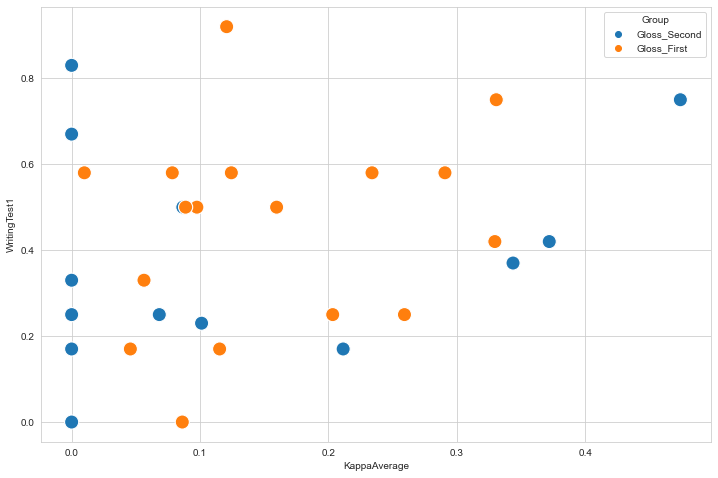

In [44]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 8))
scatter_plot = sns.scatterplot(
    data = simple_df,
    x = 'KappaAverage',
    y = 'WritingTest1',
    hue = 'Group',
    s = 200
)

plt.show()

Now let's add regression lines for both groups.

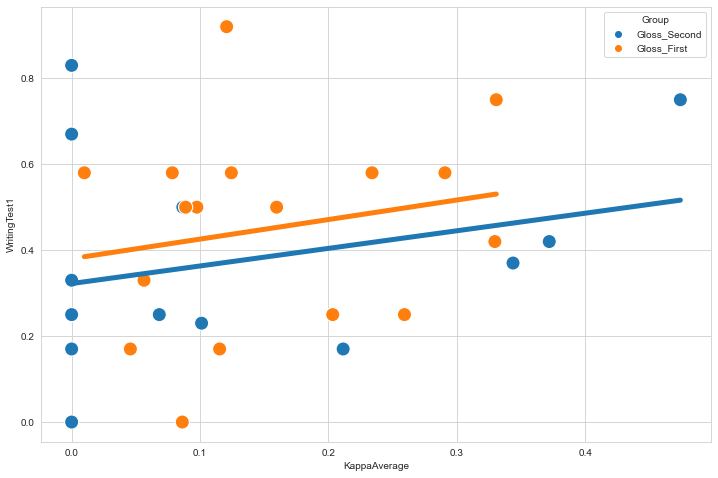

In [45]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 8))
scatter_plot = sns.scatterplot(
    data = simple_df,
    x = 'KappaAverage',
    y = 'WritingTest1',
    hue = 'Group',
    s = 200
)

groups = simple_df['Group'].unique()
for group in groups:
    subset = simple_df[simple_df['Group'] == group]
    sns.regplot(
        data = subset,
        x = 'KappaAverage',
        y = 'WritingTest1',
        scatter = False,
        ci = None,
        line_kws = {'linewidth': 5},
        label = f"{group} fit"
    )

plt.show()

Now let's add our labels and title.

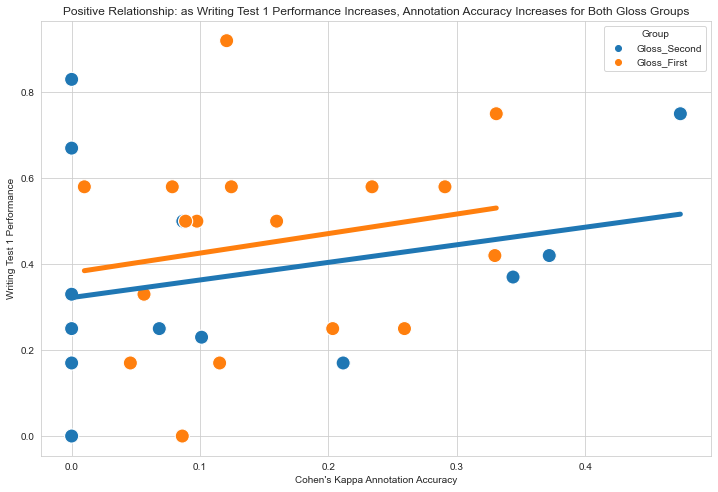

In [46]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 8))
scatter_plot = sns.scatterplot(
    data = simple_df,
    x = 'KappaAverage',
    y = 'WritingTest1',
    hue = 'Group',
    s = 200
)

groups = simple_df['Group'].unique()
for group in groups:
    subset = simple_df[simple_df['Group'] == group]
    sns.regplot(
        data = subset,
        x = 'KappaAverage',
        y = 'WritingTest1',
        scatter = False,
        ci = None,
        line_kws = {'linewidth': 5},
        label = f"{group} fit"
    )

plt.xlabel("Cohen's Kappa Annotation Accuracy")
plt.ylabel("Writing Test 1 Performance")
plt.title("Positive Relationship: as Writing Test 1 Performance Increases, Annotation Accuracy Increases for Both Gloss Groups")

plt.show()

Now I'll repeat the same steps for Writing Test 2: first a scatter plot, then add linear regression lines, and finally include both components with labels and title.

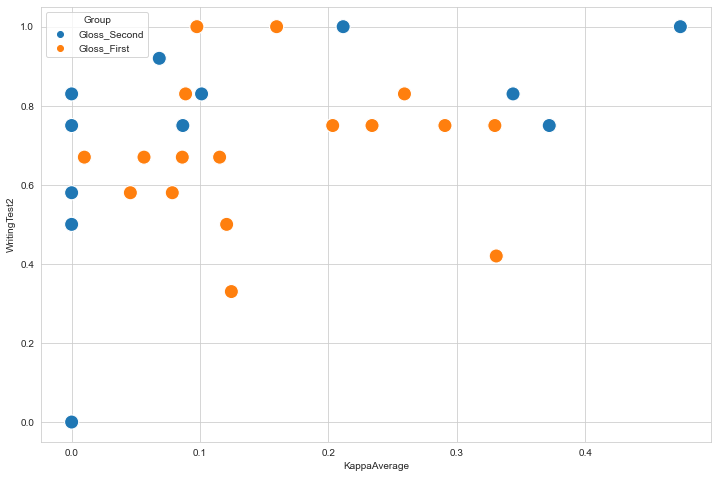

In [47]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 8))
scatter_plot = sns.scatterplot(
    data = simple_df,
    x = 'KappaAverage',
    y = 'WritingTest2',
    hue = 'Group',
    s = 200
)

plt.show()

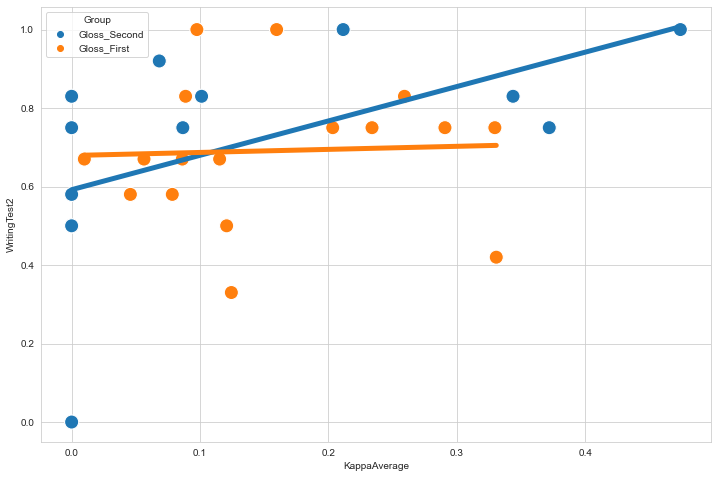

In [48]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 8))
scatter_plot = sns.scatterplot(
    data = simple_df,
    x = 'KappaAverage',
    y = 'WritingTest2',
    hue = 'Group',
    s = 200
)

groups = simple_df['Group'].unique()
for group in groups:
    subset = simple_df[simple_df['Group'] == group]
    sns.regplot(
        data = subset,
        x = 'KappaAverage',
        y = 'WritingTest2',
        scatter = False,
        ci = None,
        line_kws = {'linewidth': 5},
        label = f"{group} fit"
    )

plt.show()

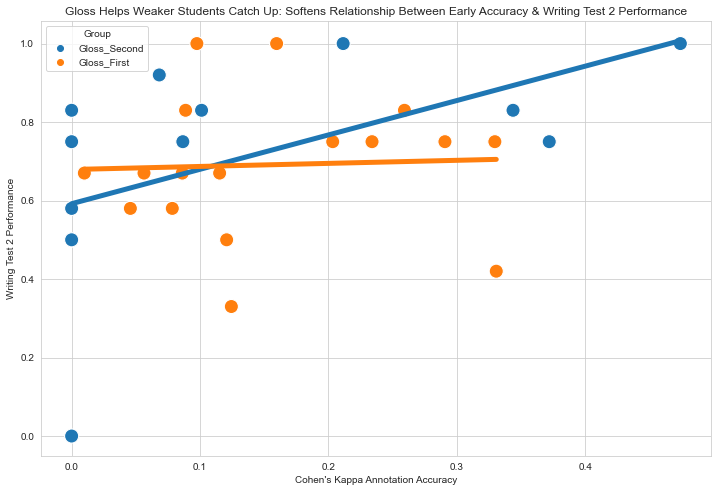

In [49]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 8))
scatter_plot = sns.scatterplot(
    data = simple_df,
    x = 'KappaAverage',
    y = 'WritingTest2',
    hue = 'Group',
    s = 200
)

groups = simple_df['Group'].unique()
for group in groups:
    subset = simple_df[simple_df['Group'] == group]
    sns.regplot(
        data = subset,
        x = 'KappaAverage',
        y = 'WritingTest2',
        scatter = False,
        ci = None,
        line_kws = {'linewidth': 5},
        label = f"{group} fit"
    )

plt.xlabel("Cohen's Kappa Annotation Accuracy")
plt.ylabel("Writing Test 2 Performance")
plt.title("Gloss Helps Weaker Students Catch Up: Softens Relationship Between Early Accuracy & Writing Test 2 Performance")

plt.show()

### Regression Models

Let's run a few regression models to understand our findings. 

In [52]:
model1 = smf.ols('WritingTest1 ~ KappaAverage + C(Group)', data = simple_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           WritingTest1   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.312
Date:                Fri, 17 Oct 2025   Prob (F-statistic):              0.285
Time:                        14:46:43   Log-Likelihood:                 2.8365
No. Observations:                  31   AIC:                            0.3270
Df Residuals:                      28   BIC:                             4.629
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Here, we do not find any significant effects.

In [53]:
model2 = smf.ols('WritingTest2 ~ KappaAverage + C(Group)', data = simple_df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           WritingTest2   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.296
Date:                Fri, 17 Oct 2025   Prob (F-statistic):              0.119
Time:                        14:49:28   Log-Likelihood:                 6.1466
No. Observations:                  31   AIC:                            -6.293
Df Residuals:                      28   BIC:                            -1.991
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Yes, there are significant differences for Cohen's Kappa when looking at WritingTest2 performance.